# Principal Component Analysis

这部分，你将运用PCA来实现降维<br/>
您将首先通过一个2D数据集进行实验，以获得关于PCA如何工作的直观感受，然后在一个更大的图像数据集上使用它

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## 1. Implementing PCA

### 数据初始化

In [3]:
data = loadmat("data1.mat")
X = data["X"]
X.shape,type(X)

((50, 2), numpy.ndarray)

<Figure size 576x360 with 0 Axes>

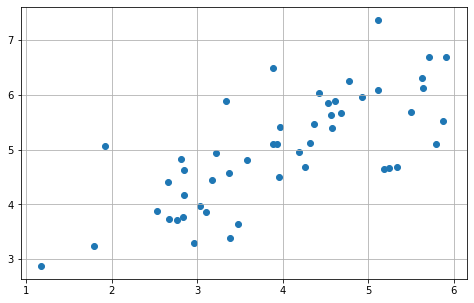

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1])
plt.grid(True)

### Feature scaling

In [5]:
def featureNormalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0, ddof=1)
    X_norm = (X - means) / stds
    return X_norm, means, stds

### Compute Eigenvectors Matrix

In [6]:
def pca(X):
    sigma = (X.T @ X) / len(X) 
    U, S, V = np.linalg.svd(sigma)
    return U, S, V

In [7]:
X_norm, means, stds = featureNormalize(X)
U, S, V = pca(X_norm)

<Figure size 504x360 with 0 Axes>

(0.9352314030578326, 6.156300248189644, 2.642327687079511, 7.599563030370963)

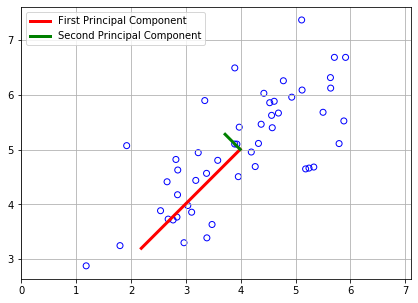

In [8]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')
plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        c='r', linewidth=3, label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        c='g', linewidth=3, label='Second Principal Component')
plt.grid()

#changes limits of x or y axis so that equal increments of x and y have the same length
#不然看着不垂直，不舒服
plt.axis("equal")  
plt.legend()

这是特征矩阵对应的两个特征值和特征向量，方向代表特征向量，长度代表特征值<br/>
下面我们将选择First Principal Component来做投影

### Project data onto the principal component

In [9]:
def projectData(X,U,K):
    Ureduce = U[:,0:K]
    Z = X @ Ureduce # array的矩阵乘法
    return Z

In [10]:
Z = projectData(X_norm, U, 1)

### Reconstructing an approximation of the data

In [11]:
def recoverData(Z,U,K):
    Ureduce = U[:,0:K]
    X_reverse = Z @ Ureduce.T
    return X_reverse

In [12]:
X_reverse = recoverData(Z, U, 1)

### Visualizing the projections

<Figure size 864x576 with 0 Axes>

(-0.05, 1.05, -0.05, 1.05)

Text(0.5, 1.0, 'Example Dataset: Reduced Dimension Points Shown')

Text(0.5, 0, 'x1 [Feature Normalized]')

Text(0, 0.5, 'x2 [Feature Normalized]')

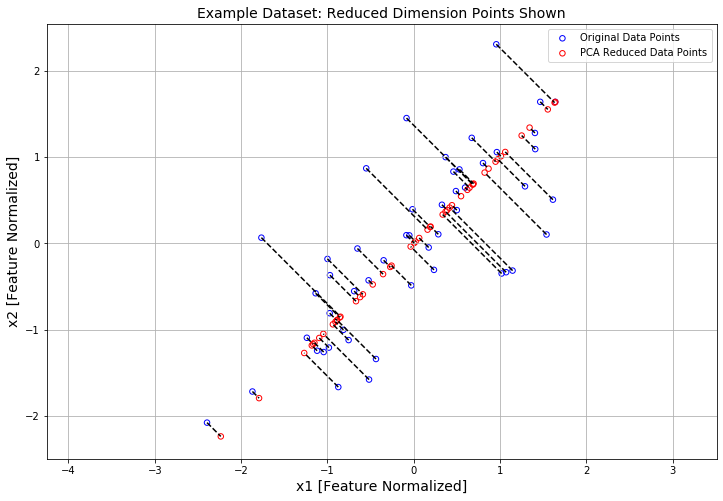

In [13]:
plt.figure(figsize=(12,8))
plt.axis("equal") 
plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plt.scatter(X_reverse[:,0], X_reverse[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_reverse[x,0]],[X_norm[x,1],X_reverse[x,1]],'k--')
    # 输入第一项全是X坐标，第二项都是Y坐标
plt.legend()

## 2. Face Image PCA

The dataset contains face images data, each image is 32 × 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024)

### 变量初始化

In [14]:
Face_images = loadmat("faces.mat")
X = Face_images["X"]
X.shape,type(X)

((5000, 1024), numpy.ndarray)

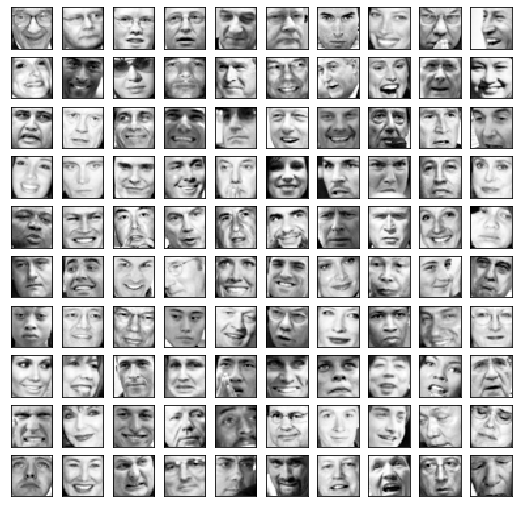

In [15]:
def plotData(X,row,col):
    fig, ax = plt.subplots(nrows=row, ncols=col, sharey=True, sharex=True, figsize=(9,9))
    for i in range(row):
        for j in range(row):
            ax[i,j].imshow(X[i*row+j].reshape(32,32).T,cmap="Greys_r")
            plt.xticks([])
            plt.yticks([])
plotData(X,10,10)

### Do PCA

In [16]:
X_norm, means, stds = featureNormalize(X)
U, S, V = pca(X_norm)

In [77]:
#99% of variance is retained
def selectNumber(S):
    Var_sum = 0
    total_Var = np.sum(S)
    for i in range(len(S)):
        Var_sum = Var_sum + S[i]
        if Var_sum/total_Var >=0.99:
            break 
    return i

In [83]:
selectNumber(S)

334

In [85]:
Z = projectData(X_norm,U,K=334)
X_reverse = recoverData(Z,U,K=334)

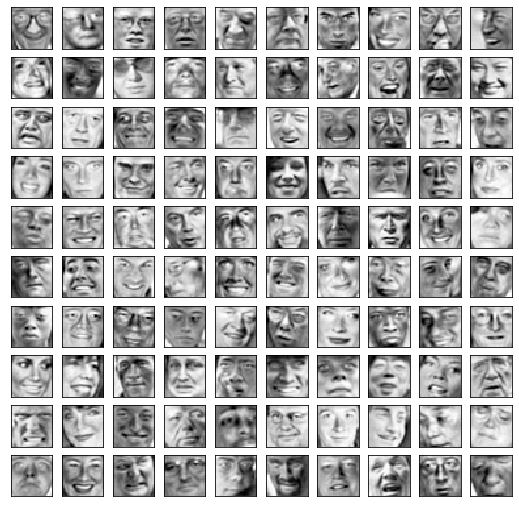

In [87]:
plotData(X_reverse,10,10)